In [1]:
import matplotlib.pyplot as plt
import numpy as np

(0.0, 10.0)

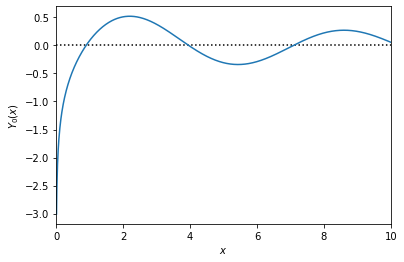

In [23]:
# Exercise 1

from scipy.special import yv

# order of the Bessel function
a = 0

x = np.arange(0, 10.01, 0.01)
y = yv(a, x)

plt.xlabel('$x$')
plt.ylabel('$Y_0(x)$')
plt.plot(x, y)
plt.hlines(0, 0, 10, linestyle=':')
plt.xlim(0, 10)

In [31]:
# Find third root
from scipy.optimize import fsolve

def f(z, a):
    return yv(a, z)

r = fsolve(f, 7, args=a)
r

array([7.08605106])

In [33]:
# Exercise 2
from scipy.integrate import quad

# third root
r = fsolve(f, 7, args=a)
print(quad(f, 0, r, args=a))

(-0.29488939975237555, 8.26664958708534e-10)


[-20.10098368 -15.0361921   -9.97140052  -4.90660895   0.15818263
   5.2229742   10.28776578  15.35255736  20.41734893  25.48214051
  30.54693209]


[-17.56858788950619,
 -12.50379631305536,
 -7.439004736604528,
 -2.3742131601536958,
 2.6905784162971376,
 7.755369992747969,
 12.820161569198802,
 17.884953145649636,
 22.949744722100466,
 28.0145362985513]

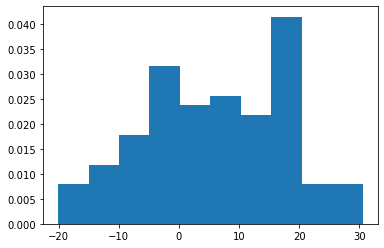

In [49]:
# Exercise 3
from scipy.stats import norm

x = norm.rvs(6, 11.5, size=100) # specify pdf parameters

n, bins, patches = plt.hist(x, density=True, bins=10)
print(bins)

centres = []
for i in range(0, len(bins)-1):
    centres.append(0.5 * (bins[i] + bins[i+1]))
centres

201


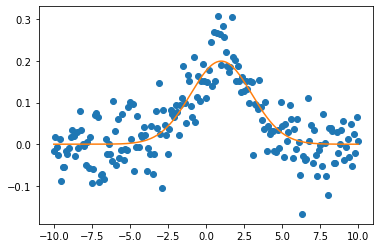

In [138]:
# Exercise 4

import scipy.stats as stats

def f(m, s, a, x, y):
    model = stats.norm(m, s)
    return np.sum((y - a * model.pdf(x))**2)

np.random.seed(12345)

m = 1
s = 2
a = 1
p = stats.norm(m, s)
x = np.arange(-10, 10.01, 0.1)
print(len(x))
n = a * p.pdf(x)

np.random.seed(15)

noise = norm.rvs(0., 0.05, size=len(x))
data = a * p.pdf(x) + noise
f(m, s, a, x, data)

plt.plot(x, data, 'o')
plt.plot(x, n)


In [132]:
stats.norm.fit?

In [142]:
# Exercise 5
from scipy import optimize

#optimize.minimize(model, (0, 0, 0, x, y), args=(m, s, a, x, y))

model = stats.norm(m, s)
realvalues = model.pdf(x)

mu, sigma = stats.norm.fit(realvalues)
print(mu, sigma)

0.04975109306099628 0.06739519356862844
